# Apresentação:

# Importações:

In [8]:
# Importações para utilização geral:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [9]:
# Importações referêntes ao sklearn:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler



```
Note que as importações possuem dois tipos... Ou estamos importando
funções, ou estamos importando classes. Note que as importações com
letras maiúsculas são classes, enquanto as com apenas letras minúsculas
são funções.
```



In [10]:
df = pd.read_csv('exemplo2.csv')
print('Informações do Dataframe:')
df.sort_index(axis=1).info(verbose=True)
print('\nDataFrame:')
display(df)

Informações do Dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   conta_corrente  2500 non-null   float64
 1   idade           2500 non-null   float64
 2   risco           2500 non-null   object 
dtypes: float64(2), object(1)
memory usage: 58.7+ KB

DataFrame:


,idade,conta_corrente,risco
0,21.257389,783.127911,ruim
1,21.766573,979.747521,bom
2,25.321033,1065.328054,ruim
3,23.919268,1195.758078,bom
4,21.805298,1083.764450,bom
...,...,...,...
2495,63.840703,2847.204903,ruim
2496,57.367341,3238.149058,bom
2497,65.785408,2603.620751,ruim
2498,52.944838,2985.948214,ruim


# Visualização:

In [11]:
#Reconhecendo as variáveis que possuem dados NaN:
def checa_null():
  colunas_nulas = 0
  enulo=df.isnull().sum()
  for variavel, valor in enulo.items():
      if valor != 0.0:
        colunas_nulas += 1
        print(str(variavel)+' -> '+str(valor))

  if colunas_nulas == 0:
    print('Não há colunas com valores NaN')
checa_null()

Não há colunas com valores NaN


## Visualizações Básicas:

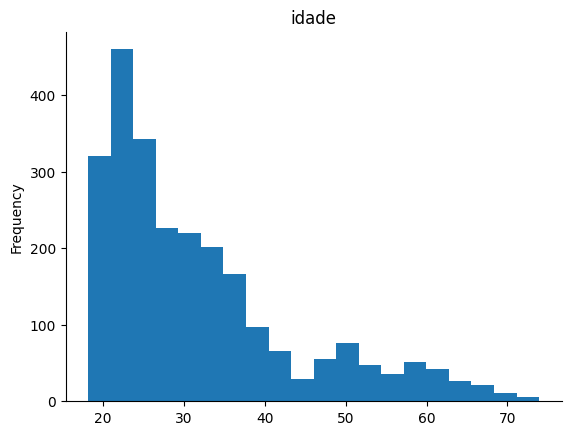

In [12]:
df['idade'].plot(kind='hist', bins=20, title='idade')
plt.gca().spines[['top', 'right',]].set_visible(False)

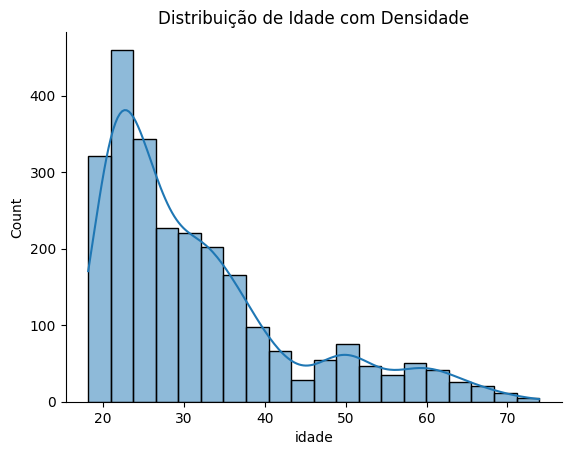

In [13]:
# Distribuição dos dados de Idade:
sns.histplot(data=df, x='idade', bins=20, kde=True)
plt.title('Distribuição de Idade com Densidade')
plt.gca().spines[['top', 'right']].set_visible(False)

plt.show()

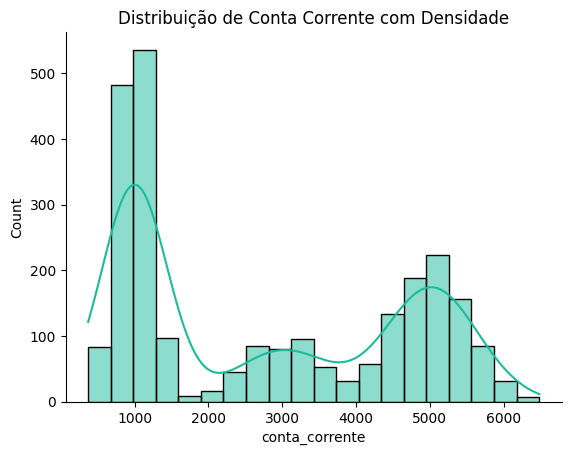

In [14]:
# Distribuição dos dados de Conta Corrente:
sns.histplot(data=df, x='conta_corrente', bins=20, kde=True, color = '#1ABC9C')
plt.title('Distribuição de Conta Corrente com Densidade')
plt.gca().spines[['top', 'right']].set_visible(False)

plt.show()

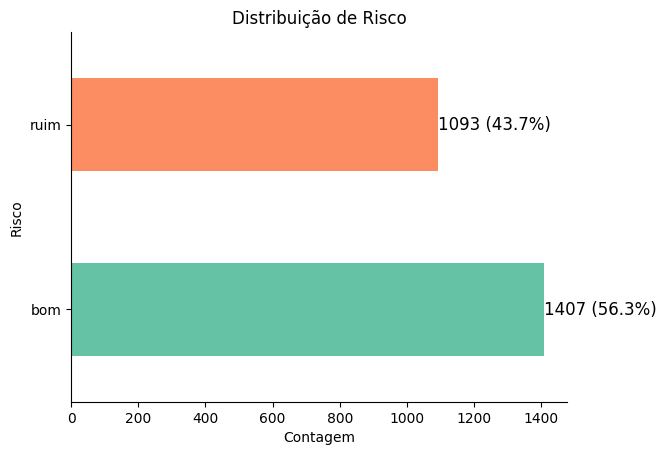

In [15]:
# Supondo que 'df' é o seu DataFrame e 'risco' é a coluna que você deseja plotar
data = df['risco'].value_counts().sort_index()

# Escolha cores significativas
colors = sns.color_palette("Set2", len(data))

# Plote o gráfico de barras
ax = data.plot(kind='barh', color=colors)
plt.title('Distribuição de Risco')
plt.xlabel('Contagem')
plt.ylabel('Risco')

# Adicione porcentagens nas barras
total = data.sum()
for i, v in enumerate(data):
    percent = 100 * v / total
    ax.text(v, i, f'{v} ({percent:.1f}%)', va='center', fontsize=12)

plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

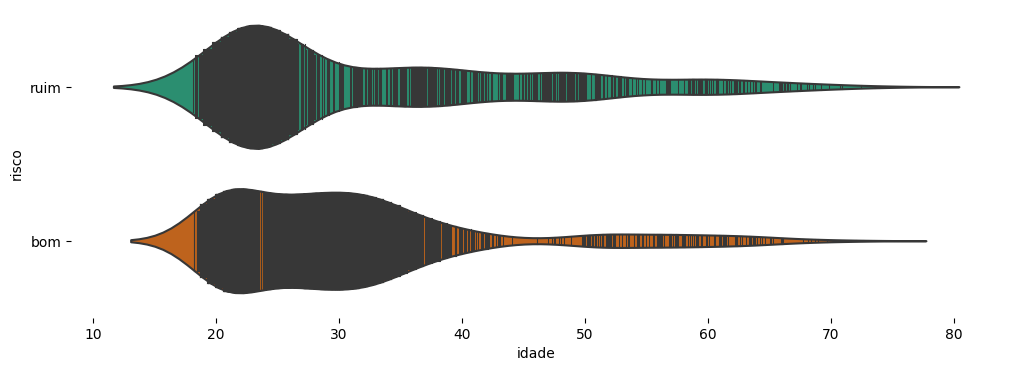

In [16]:
figsize = (12, 2 * len(df['risco'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='idade', y='risco', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

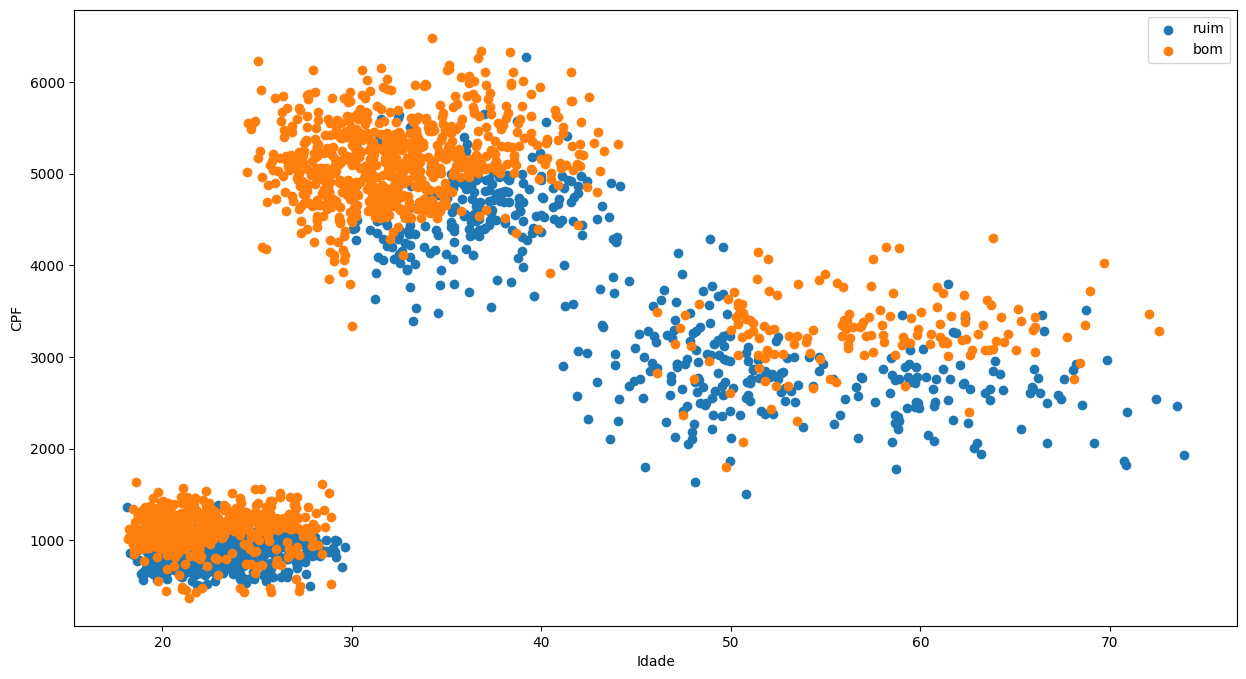

In [17]:
# Definindo tamanho da visualização:
plt.figure(figsize=(15, 8))

# Definindo gráfico:
plt.scatter(df[df.risco == 'ruim'].idade, df[df.risco == 'ruim'].conta_corrente)
plt.scatter(df[df.risco == 'bom'].idade, df[df.risco == 'bom'].conta_corrente)

# Ajustando informações:
plt.xlabel('Idade')
plt.ylabel('CPF')
plt.legend(['ruim', 'bom'])
plt.show()

# Classificação:

## Classificação crua:

In [18]:
# Separando as informações de Input(X) e Output(y)
X = df.drop('risco',axis=1)
y = df.risco

#Checando a informação:
display(X)
print()
display(y)

,idade,conta_corrente
0,21.257389,783.127911
1,21.766573,979.747521
2,25.321033,1065.328054
3,23.919268,1195.758078
4,21.805298,1083.764450
...,...,...
2495,63.840703,2847.204903
2496,57.367341,3238.149058
2497,65.785408,2603.620751
2498,52.944838,2985.948214


0       ruim
1        bom
2       ruim
3        bom
4        bom
        ... 
2495    ruim
2496     bom
2497    ruim
2498    ruim
2499     bom
Name: risco, Length: 2500, dtype: object

In [19]:
# Treinamento:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X,y)

KNeighborsClassifier(n_neighbors=3)

In [20]:
# Treinamento/teste:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=2/3)

In [21]:
print(X_train.shape)
print(y_test.shape)

(1666, 2)
(834,)


In [33]:
# Classificação:
knn2 = KNeighborsClassifier(n_neighbors=3)
knn2.fit(X_train,y_train)

# Medindo precisão:
metrica = round(accuracy_score(y_test,knn2.predict(X_test)),2)
metrica

0.81

## Melhorando a qualidade da classificação:

Em se tratando de classificadores, um método útil para melhorar as métricas,
que por vezes podem não vir tão boa, é o pré processamento dos inputs. Uma
das técnicas de pré processamento é a normalização dos dados.

O MinMaxScaler não reduz o efeito de valores atípicos, mas os dimensiona
linearmente para um intervalo fixo (0,1), onde o valor de dados mais alto
corresponde ao valor máximo e o valor mais baixo corresponde ao valor mínimo.
Para uma visualização de exemplo, consulte a comparação do MinMaxScaler com
outros escaladores.



In [32]:
# Criando o normalizador:
normalizador = MinMaxScaler()


Funções vs Métodos:
```
Classes precisam ser "armazenadas" em variáveis. O que costuma
ser dito, é que ponteiros (pointers) não são coisas apenas de C,
porém, no python, a própria variável é o ponteiro. Deste modo,
estamos alocando a classe na memória.

Por isso, classes precisam ser guardadas em variáveis, mais funções
não. Note que quando importamos funções. Pode-se utiliza-las sem
nenhum problema. Já para as classes, eu tive que "armazena-la"
numa variável.
```



In [30]:
X_norm = normalizador.fit_transform(X)
X_norm

array([[0.05586473, 0.06720224],
       [0.06499436, 0.09938945],
       [0.12872564, 0.11339923],
       ...,
       [0.85424954, 0.36522222],
       [0.62401886, 0.42781034],
       [0.61473291, 0.54031447]])

In [31]:
print(type(X))
print(type(X_norm))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


Mudança de Tipo:


```
Note que o tipo do dado mudou. Depois da transformação
as matrizes vieram como um array numpy. Note como se faz
importante aqui ter um bom entendimento da linaguagem
matemática e de bibliotecas criadas para matemática
computacional.

Quanto mais se deseja manipular as informações, quanto
mais de aprofunda o conhecimento nessa área de ML
(Machine Learning), mais se faz necessário saber esse tipo
de conhecimento.
```



In [34]:
# Recontruindo o teste com o X normalizado:
X_train, X_test, y_train, y_test = train_test_split(X_norm,y,train_size=2/3)

In [35]:
# Classificação:
knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(X_train,y_train)

# Medindo precisão:
metrica_normalizada = round(accuracy_score(y_test,knn3.predict(X_test)),2)
metrica_normalizada

0.85

In [41]:
m= round((metrica_normalizada - metrica)/100,4)

print(f'Métrica inicial = {metrica} e métrica normalizada = {metrica_normalizada}`.')
print(f'Aumento efetivo = {m}')

Métrica inicial = 0.81 e métrica normalizada = 0.85`.
Aumento efetivo = 0.0004




```
Note que para esse tipo de caso não foi uma diferença
significativa. De todo modo, a técnica está apresentada.
```

